<a href="https://colab.research.google.com/github/UV97/Optimization_Wet_Homework/blob/main/HW_Wet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Given:
$$
n=3,\space a_0=0,\space a_1=1,\space a_2=1/2,\space a_3=-2
$$

Create a vector $\textbf{x} ∈ \mathbb{R}^m$ of $m = 10,000$ measurement points randomly sampled from a uniform distribution over the section [-1,1]

In [ ]:
m = 10000
x = np.random.uniform(low=-1, high=1, size=m)
x

array([ 0.46667033,  0.29199716, -0.75751527, ...,  0.44569747,
       -0.850312  ,  0.70126528])

For this vector $x$ calculate $f(x_i)=a_0+a_1x_i+a_2x_i^2+a_3x_i^3,\space i=1,2,...,m$

In [ ]:
n = 3
a_0 = 0
a_1 = 1
a_2 = 1/2
a_3 = -2

f = a_0 + a_1 * x + a_2 * x**2 + a_3 * x**3
f

array([0.37229688, 0.2848356 , 0.39876847, ..., 0.36794834, 0.74080626,
       0.25742513])

In [ ]:
len(f)


10000

Create the vector $\textbf{y}$, where $y_i=f(x_i)+w_i, \space i=1,2,...,m$ by adding Gaussian noise $w_i$ with variance $σ^2 = 0.5$ to each of the measurements.

In [ ]:
variance = 0.5
w = np.random.normal(loc=0, scale=np.sqrt(variance), size=m)
y = f + w
y

array([ 0.11450643,  0.69979474, -0.07262445, ...,  0.59353626,
       -0.01505308,  0.10245699])

#**Part 1**

Write a function that receives as input the vectors $\textbf{x}$ and $\textbf{y}$ and returns as output the estimated vector of coefficients $\textbf{a*}$

In [ ]:
def estimate_coefficients(x, y):
    
    # Create the X matrix
    X = np.column_stack([x**j for j in range(n+1)])

    # Compute the estimated coefficients
    X_transpose = np.transpose(X)
    XtX = np.dot(X_transpose, X)
    XtX_inverse = np.linalg.inv(XtX)
    Xty = np.dot(X_transpose, y)
    a_star = np.dot(XtX_inverse, Xty)

    return a_star


Run the above function for the $\textbf{x}$ and $\textbf{y}$ vectors created earlier

In [ ]:
a_estimated = estimate_coefficients(x, y)
a_estimated

array([ 0.00537242,  0.98013213,  0.4943082 , -1.97583268])

As you can see $\textbf{a*}$ is approximated quite well to the original coefficients $a_0=0,\space a_1=1,\space a_2=1/2,\space a_3=-2$

Draw on one graph in the segment [-1,1]:<br>
• The polynom $f(\textbf{x})$.<br>
• The vector of the noisy measurements $\textbf{y}$. <br>
• The estimated polynom $\hat{f}(\textbf{x})$

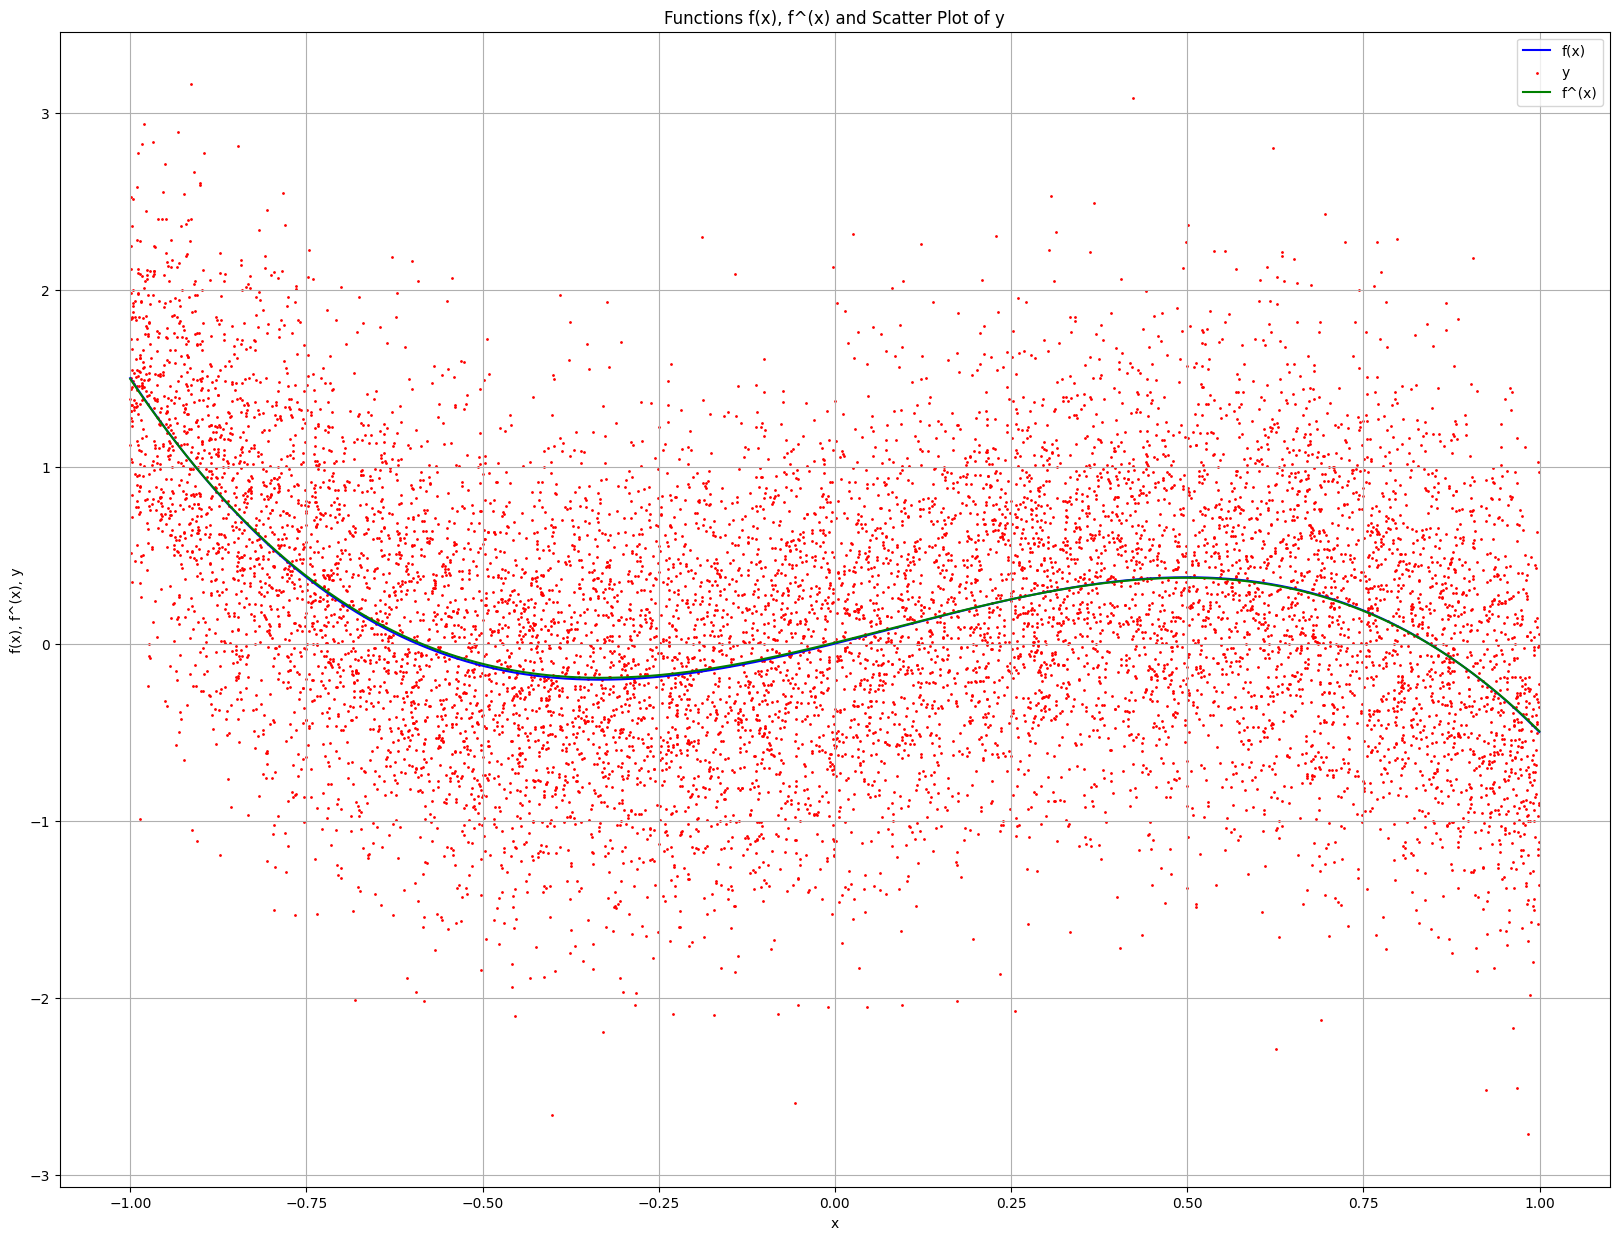

In [ ]:
#Calculate the estimated polynom f^(x)
f_estimated = a_estimated[0] + a_estimated[1] * x + a_estimated[2] * x**2 + a_estimated[3] * x**3

#Plot the graph
plt.figure(figsize=(20, 15))
plt.plot(sorted(x), f[np.argsort(x)], c='blue', label='f(x)')
plt.scatter(x, y, c='red', label='y',s=1)
plt.plot(sorted(x), f_estimated[np.argsort(x)], c='green', label='f^(x)')
plt.xlabel('x')
plt.ylabel('f(x), f^(x), y')
plt.title('Functions f(x), f^(x) and Scatter Plot of y')
plt.legend()
plt.grid(True)
plt.show()

As you can see from the graph, although the $\textbf{y}$ samples are very scattered, we received a successful estimation of $\textbf{a}$, because both functions - the original and the estimated one - converge each other on the graph.